In [168]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [186]:
def get_random_value():
    N = 100000
    return random.randint(0, N - 1) / N

def get_numbers_of_elements(probability, experiments):
    numbers_of_elements = np.zeros(experiments, dtype=int)

    for i in range(experiments):
        count = 1
        while get_random_value() >= probability:
            count += 1
        numbers_of_elements[i] = count

    return numbers_of_elements.tolist()

In [187]:
def get_statistical_table(source_list, experiments):
    max_number = max(source_list)

    random_variables = [int(var) for var in range(1, max_number + 1)
                                          if var in source_list]

    numbers_of_random_variables = [int(source_list.count(num))
                                            for num in range(1, max_number + 1)
                                            if num in source_list]

    frequencies_of_random_variables = [num / experiments
                                      for num in numbers_of_random_variables]

    columns = list(range(1, len(random_variables) + 1))
    data = [
        [str(v) for v in random_variables],
        [str(v) for v in numbers_of_random_variables],
        frequencies_of_random_variables
    ]

    df = pd.DataFrame(data, index=['yi', 'ni', 'ni/n'], columns=columns)
    pd.set_option('display.max_columns', None)

    return df

In [188]:
P = lambda p, x: (1 - p) ** (x - 1) * p

def geometric_distribution(p, k):
    probability = 0
    for n in range(1, k):
        probability += P(p, n)
    return probability

def sample_distribution(sample, n, x):
    frequency = 0
    for num in sample:
        if num < x:
            frequency += 1
    return frequency / n

In [189]:
def get_expectation(p):
    return 1 / p

def get_sample_average(sample_values, experiments):
    return sum(sample_values) / experiments

def get_variance(p):
    return (1 - p) / (p ** 2)

def get_sample_variance(sample_values, experiments):
    sample_variance = 0
    sample_average = get_sample_average(sample_values, experiments)

    for num in sample_values:
        sample_variance += (num - sample_average)**2

    sample_variance /= experiments
    return sample_variance

def get_sample_median(sample_values, experiments):
    if (experiments % 2 != 0):
        return sample_values[len(sample_values) // 2]
    else:
        middle = experiments // 2
        return (sample_values[middle] + sample_values[middle - 1]) / 2

def get_sample_size(sample_values):
    return sample_values[-1] - sample_values[0]

In [190]:
def get_characteristics_table(table, sample, prob, experiments):
    values = table.loc['yi']
    counts = table.loc['ni']
    freqs = table.loc['ni/n']
    sample.sort()

    expectation = get_expectation(prob)
    sample_average = get_sample_average(numbers, experiments)
    variance = get_variance(prob)
    sample_variance = get_sample_variance(numbers, experiments)

    characteristics = [
        expectation,
        sample_average,
        abs(expectation - sample_average),
        variance,
        sample_variance,
        abs(variance - sample_variance),
        get_sample_median(numbers, n),
        get_sample_size(numbers)
    ]
    decimal_places = 5

    chars = ['Eη', 'x̅', '|Eη - x̅|', 'Dη', 'S²', '|Dη - S²|', 'M̂', 'R̂']
    char_vals = [round(char, decimal_places) for char in characteristics]

    data2 = dict(zip(chars, char_vals))

    df = pd.DataFrame(data2, index=[''])

    return df

**Первая часть:**

In [176]:
task_text = ''' ЭВМ генерирует последовательность чисел до получения некоторого
заданного числа. Вероятность генерации этого числа на каждом шаге
независимо от других шагов равна p. С.в. η — число элементов полу-
ченной последовательности.
'''

print("Содержание задачи:\n")
print(task_text)

p = float(input("Вероятность генерации заданного числа p = "))
n = int(input("Число экспериментов n = "))

numbers = get_numbers_of_elements(p, n)
table = get_statistical_table(numbers, n)

print("\nРезультаты:\n")

table

Содержание задачи:

 ЭВМ генерирует последовательность чисел до получения некоторого
заданного числа. Вероятность генерации этого числа на каждом шаге
независимо от других шагов равна p. С.в. η — число элементов полу-
ченной последовательности.

Вероятность генерации заданного числа p = 0.5
Число экспериментов n = 10000

Результаты:



,1,2,3,4,5,6,7,8,9,10,11,12
yi,1,2,3,4,5,6,7,8,9,10,11,12
ni,4896,2549,1290,639,305,147,100,40,18,10,4,2
ni/n,0.4896,0.2549,0.129,0.0639,0.0305,0.0147,0.01,0.004,0.0018,0.001,0.0004,0.0002


**Вторая часть:**

In [191]:
values = table.loc['yi']
counts = table.loc['ni']
freqs = table.loc['ni/n']
numbers.sort()

discrepancy = [max(j / n - geometric_distribution(p, numbers[j - 1]),
                    geometric_distribution(p, numbers[j - 1]) - (j - 1) / n)
                    for j in range(1, n + 1)]

char_table = get_characteristics_table(table, numbers, p, n)
print("Мера расхождения: D = ", max(discrepancy), "\n")
char_table

Мера расхождения: D =  0.4896 



,Eη,x̅,|Eη - x̅|,Dη,S²,|Dη - S²|,M̂,R̂
,2.0,2.0177,0.0177,2.0,1.98219,0.01781,2.0,11


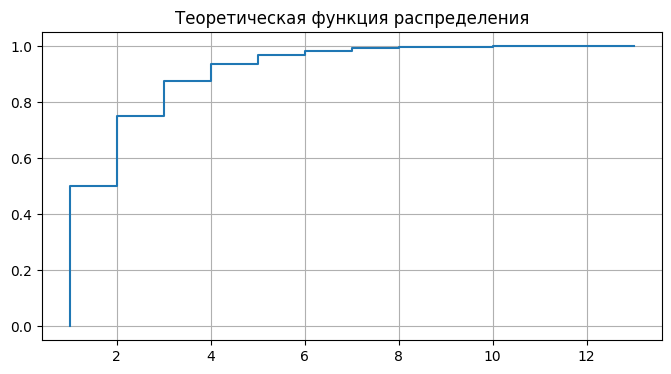

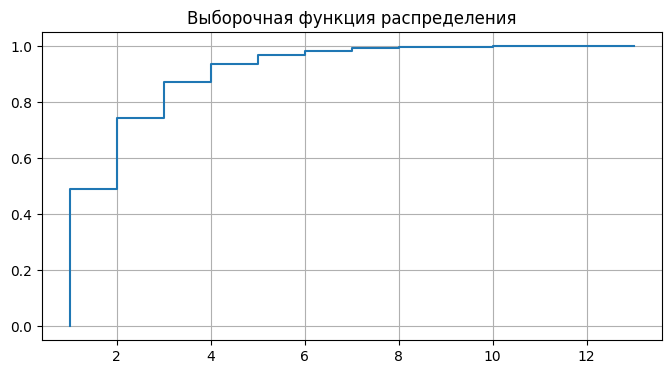


 Максимальное отклонение:  0.01040000000000002 



,1,2,3,4,5,6,7,8,9,10,11,12
yj,1,2,3,4,5,6,7,8,9,10,11,12
P({η=yj}),0.5,0.25,0.125,0.0625,0.03125,0.015625,0.007812,0.003906,0.001953,0.000977,0.000488,0.000244
nj/n,0.4896,0.2549,0.129,0.0639,0.0305,0.0147,0.01,0.004,0.0018,0.001,0.0004,0.0002


In [195]:
args = range(1, max(numbers) + 2)

vals1 = []
for arg in args:
    vals1.append(geometric_distribution(p, arg))

plt.figure(figsize=(8, 4))
plt.step(list(args), vals1)
plt.title('Теоретическая функция распределения')
plt.grid(True)

vals2 = []
vals2.clear()
for arg in args:
    vals2.append(sample_distribution(numbers, n, arg))

plt.figure(figsize=(8, 4))
plt.step(list(args), vals2)
plt.title('Выборочная функция распределения')
plt.grid(True)

plt.show()

probabilities = [P(p, float(yj)) for yj in values]
deviations = [abs(float(nj) / n - pj) for pj, nj in zip(probabilities, counts)]

columns = list(range(1, len(values) + 1))
data3 = [
    list(values),
    probabilities,
    list(freqs)
]
df = pd.DataFrame(data3, index=['yj', 'P({η=yj})', 'nj/n'], columns=columns)

print("\n Максимальное отклонение: ", max(deviations), "\n")

df